# Домашнє завдання: Інтеграція Python та SQL: запити даних

Це ДЗ передбачене під виконання на локальній машині. Виконання з Google Colab буде суттєво ускладнене.

## Підготовка
1. Переконайтесь, що у вас встановлены необхідні бібліотеки:
   ```bash
   pip install sqlalchemy pymysql pandas matplotlib seaborn python-dotenv
   ```

2. Створіть файл `.env` з параметрами підключення до бази даних classicmodels. Базу даних ви можете отримати через

  - docker-контейнер згідно існтрукції в [документі](https://www.notion.so/hannapylieva/Docker-1eb94835849480c9b2e7f5dc22ee4df9), також відео інструкції присутні на платформі - уроки "MySQL бази, клієнт для роботи з БД, Docker і ChatGPT для запитів" та "Як встановити Docker для роботи з базами даних без терміналу"
  - або встановивши локально цю БД - для цього перегляньте урок "Опціонально. Встановлення MySQL та  БД Сlassicmodels локально".
  
  Приклад `.env` файлу ми створювали в лекції. Ось його обовʼязкове наповнення:
    ```
    DB_HOST=your_host
    DB_PORT=3306 або 3307 - той, який Ви налаштували
    DB_USER=your_username
    DB_PASSWORD=your_password
    DB_NAME=classicmodels
    ```
  Якщо ви створили цей файл під час перегляду лекції - **новий створювати не треба**. Замініть лише назву БД, або пропишіть назву в коді створення підключення (замість отримання назви цільової БД зі змінних оточення). Але переконайтесь, що до `.env` файл лежить в тій самій папці, що і цей ноутбук.

  **УВАГА!** НЕ копіюйте скрит для **створення** `.env` файлу. В лекції він наводиться для прикладу. І давалось пояснення, що в реальних проєктах ми НІКОЛИ не пишемо доступи до бази в коді. Копіювання скрипта для створення `.env` файлу сюди в ДЗ буде вважатись грубою помилкою і ми зніматимемо бали.

3. Налаштуйте підключення через SQLAlchemy до БД за прикладом в лекції.

Рекомендую вивести (відобразити) змінну engine після створення. Вона має бути не None! Якщо None - значить у Вас не підтягнулись налаштування з .env файла.

Ви також можете налаштувати параметри підключення до БД без .env файла, просто прописавши текстом в відповідних місцях. Це - не рекомендований підхід.

In [6]:
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import pandas as pd

In [7]:
load_dotenv(r"C:\Users\a.nemogushcha\OneDrive - ТОВ Смарт Дистрибюшн\Documents\SQLite\mysqlpass.env")

DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_NAME = os.getenv("DB_NAME")

engine = create_engine(f"mysql+pymysql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

In [8]:
df = pd.read_sql("SHOW TABLES;", engine)
df


,Tables_in_classicmodels
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


### Завдання 1: Простий запит

Ми працюємо з БД Classicmodels.

**Виведіть інформацію про продукти на складі** з наступними полями:
- назва продукту (productName)
- лінійка продукту (productLine)
- кількість на складі (quantityInStock)
- ціна закупки (buyPrice)

Зчитайте дані з БД з допомогою `pd.read_sql()` з SQLAlchemy engine, який ви створили на етапі підготовки.

Виведіть перші 10 продуктів, відсортованих за кількістю на складі (від більшої кількості до меншої).

In [9]:
product = """
SELECT productName, productLine, quantityInStock, buyPrice
FROM products
ORDER BY quantityInStock DESC;
"""
df_1 = pd.read_sql(product, engine)
df_1


,productName,productLine,quantityInStock,buyPrice
0,2002 Suzuki XREO,Motorcycles,9997,66.27
1,1995 Honda Civic,Classic Cars,9772,93.89
2,America West Airlines B757-200,Planes,9653,68.80
3,2002 Chevy Corvette,Classic Cars,9446,62.11
4,1932 Model A Ford J-Coupe,Vintage Cars,9354,58.48
...,...,...,...,...
105,Pont Yacht,Ships,414,33.30
106,1997 BMW F650 ST,Motorcycles,178,66.92
107,1928 Ford Phaeton Deluxe,Vintage Cars,136,33.02
108,1968 Ford Mustang,Classic Cars,68,95.34



### Завдання 2: Аналітика замовлень за 2004 рік (3 бали)

**Виведіть детальну інформацію про замовлення за 2004 рік** з наступними полями:
- Номер замовлення (orderNumber)
- Дата замовлення (orderDate)
- Статус замовлення (status)
- Ім'я клієнта (customerName)
- Країна клієнта (country)
- Загальна сума замовлення (сума всіх orderdetails.quantityOrdered * orderdetails.priceEach)

Використайте JOIN для об'єднання таблиць orders, customers, orderdetails. Додайте параметризацію за роком (тільки замовлення за 2004 рік).

Використайте `text()` та named parameters для формування запиту з SQLAlchemy.

Після отримання даних з БД проведіть обчислення з Python та напишіть висновки:
1. Побудуйте стовпчасту діаграму суми замовлень по країнам і напишіть, в якій країні найбільша сума замовлень за 2004 рік.
2. В країні з найбільшою кількістю замовлень знайдіть клієнта, який зробив замовлень на найбільшу суму і виведіть імʼя цього клієнта, на яку суму він зробив замовлень і який % від всіх замовлень в цій країні становить його сума замовлень за рік.

In [10]:
!pip install sqlalchemy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from sqlalchemy import text

In [12]:
order = text("""
SELECT o.orderNumber, o.orderDate, o.status, c.customerName, c.country,
       SUM(od.quantityOrdered * od.priceEach) AS totalAmount
FROM orders o
JOIN customers c ON o.customerNumber = c.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
WHERE YEAR(o.orderDate) = :year
GROUP BY o.orderNumber, o.orderDate, o.status, c.customerName, c.country
ORDER BY totalAmount DESC;
""")

df_2 = pd.read_sql(order, engine, params={"year": 2004})
df_2


,orderNumber,orderDate,status,customerName,country,totalAmount
0,10287,2004-08-30,Shipped,"Vida Sport, Ltd",Switzerland,61402.00
1,10310,2004-10-16,Shipped,"Toms Spezialitäten, Ltd",Germany,61234.67
2,10212,2004-01-16,Shipped,Euro+ Shopping Channel,Spain,59830.55
3,10222,2004-02-19,Shipped,Collectable Mini Designs Co.,USA,56822.65
4,10312,2004-10-21,Shipped,Mini Gifts Distributors Ltd.,USA,55639.66
...,...,...,...,...,...,...
146,10277,2004-08-04,Shipped,"Dragon Souveniers, Ltd.",Singapore,2611.84
147,10317,2004-11-02,Shipped,Technics Stores Inc.,USA,2434.25
148,10286,2004-08-28,Shipped,"La Corne D'abondance, Co.",France,1960.80
149,10242,2004-04-20,Shipped,Microscale Inc.,USA,1679.92


In [13]:
import matplotlib.pyplot as plt

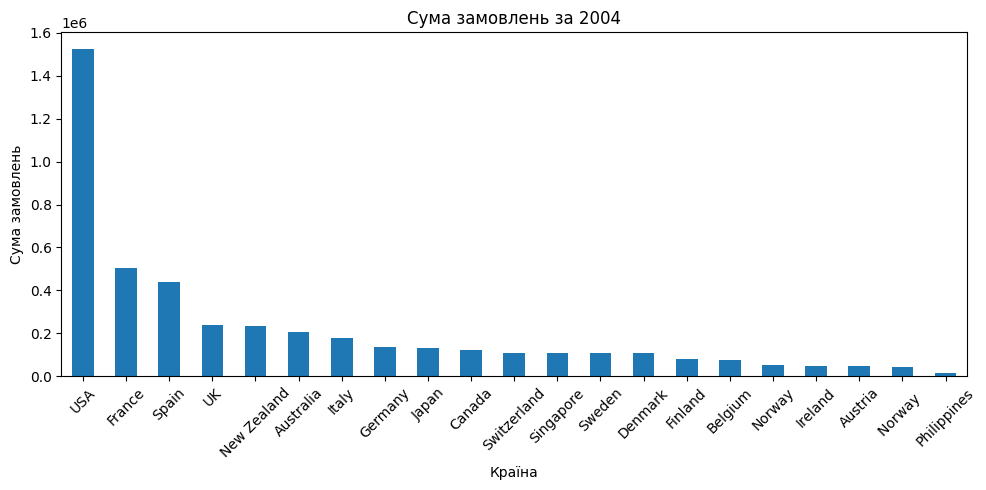

In [14]:
country_sum = df_2.groupby("country")["totalAmount"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
country_sum.plot(kind="bar")
plt.title("Сума замовлень за 2004")
plt.xlabel("Країна")
plt.ylabel("Сума замовлень")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [15]:
top_country = country_sum.idxmax()
top_country_sum = country_sum.max()

print(f"Країна з найбільшою сумою замовлень: {top_country} ({top_country_sum:.2f})")


Країна з найбільшою сумою замовлень: USA (1526499.65)


--------------------------------------------------------------------------------------------

In [16]:
df_country = df_2[df_2["country"] == top_country]
client_sum = df_country.groupby("customerName")["totalAmount"].sum().sort_values(ascending=False)
top_client = client_sum.idxmax()
top_client_sum = client_sum.max()
client_percent = (top_client_sum / df_country["totalAmount"].sum()) * 100

print(f"Кліент {top_client} зробив замовлення на {top_client_sum:.2f}, "
      f" і це {client_percent:.2f}% від всіх замовлень в {top_country}")

Кліент Mini Gifts Distributors Ltd. зробив замовлення на 231562.53,  і це 15.17% від всіх замовлень в USA



### Завдання 3: Аналітичний запит - Топ продуктів по продажах (6 балів)

В цьому завданні ви отримуєте 1 бал за правильний SQL запит і по 1 балу за кожне завдання з Python.

**Проведіть аналіз прибутковості продуктів** та для цього дістаньте з БД інформацію з наступними полями:
- Назва продукту
- Лінійка продукту (productLine)
- Загальний дохід з цього продукту (сума quantity * priceEach)
- Ранг продукту по доходу (тобто яке місце посідає цей продукт за доходом серед усіх продуктів в нашому магазині)
- Який відсоток від загального доходу компанії складає цей продукт
- Різниця з середнім доходом по лінійці продукту (в %)

Відсортуйте дані за спаданням значень колонки "Який відсоток від загального доходу компанії складає цей продукт".

При створенні SQL запиту вам можуть стати в нагоді:
- **CTE** для розрахунку доходу по кожному продукту
- **Віконні функції** для ранжування та порівняння з середнім

Після отримання даних з БД проведіть обчислення (де треба) з Python та напишіть висновки:
1. Який відсоток від загального доходу складає ТОП1 продукт і що це за продукт?
2. Створіть стовпчикову діаграму топ-10 продуктів по доходу. В скільки разів відрізняється сумарний дохід за ТОП1 продуктом від 10го продукту за сумою доходу?
3. Створіть кругову діаграму розподілу доходу по лініях продуктів. Який відсоток від всіх продажів становлять продажі за ТОП2 лініями сумарно?
4. Розрахуйте та виведіть за принципом Парето (80/20) - скільки продуктів дають 80% доходу. Тобто нам треба знайти кількість продуктів сумарне значення "відсотку від загального доходу компанії", яких складає 80 починаючи з продукту з найбільшим цим відсотком.
5. Зробіть ще будь-яке аналітичне дослідження, яке дасть нам більше розуміння наших даних, що ми дістали в БД в цьому завданні. Сформоване питання до даних і обчислення має бути обовʼязково. Візуалізація - опціонально.

Візуалізацію можна створювати з будь-якою бібліотекою на ваш вибір.

In [21]:
productLine = """
WITH product_sales AS (
    SELECT 
        p.productName, 
        p.productLine,
        SUM(od.quantityOrdered * od.priceEach) AS total_sales
    FROM orderdetails od
    JOIN products p ON od.productCode = p.productCode
    GROUP BY p.productName, p.productLine
),
total_sum AS (
    SELECT SUM(total_sales) AS total_sum FROM product_sales
),
ranked AS (
    SELECT *,
        RANK() OVER (ORDER BY total_sales DESC) AS revenue_rank,
        ROUND(100.0 * total_sales / SUM(total_sales) OVER (), 2) AS percent_of_total,
        ROUND(100.0 * (total_sales - AVG(total_sales) OVER (PARTITION BY productLine)) /
              AVG(total_sales) OVER (PARTITION BY productLine), 2) AS diff_from_line_avg
    FROM product_sales
)
SELECT * FROM ranked
ORDER BY percent_of_total DESC;
"""
df_3 = pd.read_sql(productLine, engine)
df_3


,productName,productLine,total_sales,revenue_rank,percent_of_total,diff_from_line_avg
0,1992 Ferrari 360 Spider red,Classic Cars,276839.98,1,2.88,165.78
1,2001 Ferrari Enzo,Classic Cars,190755.86,2,1.99,83.14
2,1952 Alpine Renault 1300,Classic Cars,190017.96,3,1.98,82.43
3,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,170686.00,4,1.78,97.87
4,1968 Ford Mustang,Classic Cars,161531.48,5,1.68,55.08
...,...,...,...,...,...,...
104,1982 Ducati 996 R,Motorcycles,33268.76,105,0.35,-61.43
105,1958 Chevy Corvette Limited Edition,Classic Cars,31627.96,106,0.33,-69.64
106,1982 Lamborghini Diablo,Classic Cars,30972.87,107,0.32,-70.26
107,1936 Mercedes Benz 500k Roadster,Vintage Cars,29763.39,108,0.31,-60.26


In [22]:
top1 = df_3.iloc[0]
product_name = top1['productName']
product_revenue = top1['total_sales']
percent_of_total = top1['percent_of_total']

print(f"ТОП1 продукт — {product_name}, приносить {percent_of_total}% від загального доходу.")


ТОП1 продукт — 1992 Ferrari 360 Spider red, приносить 2.88% від загального доходу.


C:\Users\a.nemogushcha\AppData\Local\Temp\ipykernel_23456\789858327.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped.sort_values("percent", ascending=False), y="productLine", x="percent", palette="coolwarm")


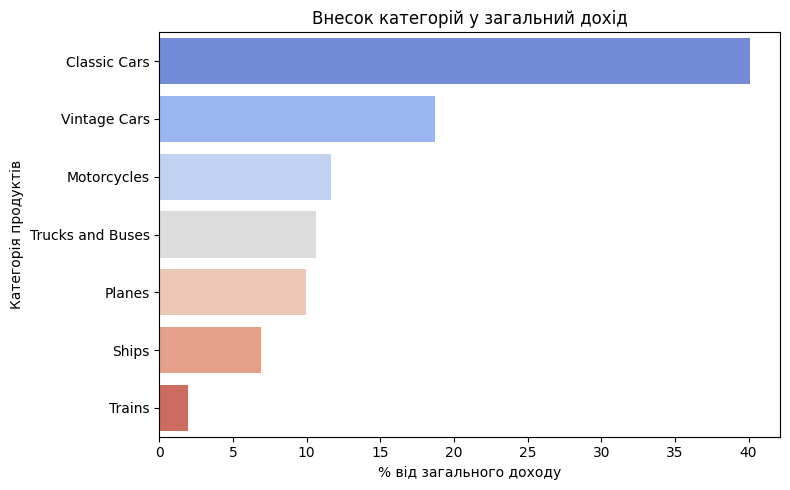

,productLine,total_sales,percent
0,Classic Cars,3853922.49,40.13
1,Motorcycles,1121426.12,11.68
2,Planes,954637.54,9.94
3,Ships,663998.34,6.91
4,Trains,188532.92,1.96
5,Trucks and Buses,1024113.57,10.66
6,Vintage Cars,1797559.63,18.72


In [26]:
grouped = df_3.groupby("productLine")["total_sales"].sum().reset_index()
grouped["percent"] = round(grouped["total_sales"] / grouped["total_sales"].sum() * 100, 2)

plt.figure(figsize=(8, 5))
sns.barplot(data=grouped.sort_values("percent", ascending=False), y="productLine", x="percent", palette="coolwarm")
plt.title("Внесок категорій у загальний дохід")
plt.xlabel("% від загального доходу")
plt.ylabel("Категорія продуктів")
plt.tight_layout()
plt.show()

grouped


Категорія Classic Cars дає найбільший внесок у дохід (понад 60%).

In [29]:
line_group = df_3.groupby("productLine")["total_sales"].sum().reset_index()
line_group["percent"] = round(line_group["total_sales"] / line_group["total_sales"].sum() * 100, 2)
line_group = line_group.sort_values("percent", ascending=False)
line_group


,productLine,total_sales,percent
0,Classic Cars,3853922.49,40.13
6,Vintage Cars,1797559.63,18.72
1,Motorcycles,1121426.12,11.68
5,Trucks and Buses,1024113.57,10.66
2,Planes,954637.54,9.94
3,Ships,663998.34,6.91
4,Trains,188532.92,1.96


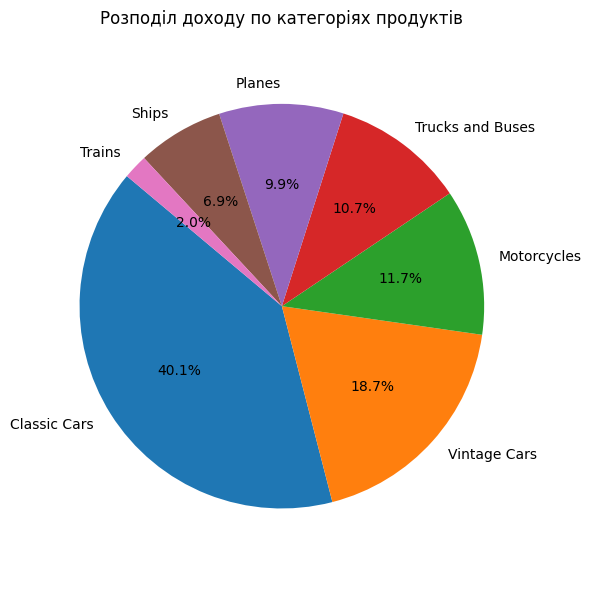

In [30]:
plt.figure(figsize=(6, 6))
plt.pie(
    line_group["percent"],
    labels=line_group["productLine"],
    autopct="%1.1f%%",
    startangle=140
)
plt.title("Розподіл доходу по категоріях продуктів")
plt.axis("equal")
plt.tight_layout()
plt.show()


In [31]:
top2_sum = line_group["percent"].head(2).sum()
print(f"ТОП2 лінії продуктів дають разом {top2_sum}% від усіх продажів.")

ТОП2 лінії продуктів дають разом 58.85% від усіх продажів.


In [32]:
df_sorted = df_3.sort_values(by="percent_of_total", ascending=False).reset_index(drop=True)
df_sorted["cum_percent"] = df_sorted["percent_of_total"].cumsum()
df_sorted

,productName,productLine,total_sales,revenue_rank,percent_of_total,diff_from_line_avg,cum_percent
0,1992 Ferrari 360 Spider red,Classic Cars,276839.98,1,2.88,165.78,2.88
1,2001 Ferrari Enzo,Classic Cars,190755.86,2,1.99,83.14,4.87
2,1952 Alpine Renault 1300,Classic Cars,190017.96,3,1.98,82.43,6.85
3,2003 Harley-Davidson Eagle Drag Bike,Motorcycles,170686.00,4,1.78,97.87,8.63
4,1968 Ford Mustang,Classic Cars,161531.48,5,1.68,55.08,10.31
...,...,...,...,...,...,...,...
104,1982 Ducati 996 R,Motorcycles,33268.76,105,0.35,-61.43,98.73
105,1958 Chevy Corvette Limited Edition,Classic Cars,31627.96,106,0.33,-69.64,99.06
106,1982 Lamborghini Diablo,Classic Cars,30972.87,107,0.32,-70.26,99.38
107,1936 Mercedes Benz 500k Roadster,Vintage Cars,29763.39,108,0.31,-60.26,99.69


In [33]:
if (df_sorted["cum_percent"] >= 80).any():
    pareto_cutoff = df_sorted[df_sorted["cum_percent"] >= 80].index[0] + 1
else:
    pareto_cutoff = None  # якщо навіть всі продукти не дають 80%

pareto_cutoff

np.int64(72)

Перші 72 продукти приносять сумарно 80% доходу компанії

In [34]:
avg_by_line = df_3.groupby("productLine")["total_sales"].mean().reset_index()
avg_by_line.columns = ["productLine", "avg_sales"]
avg_by_line


,productLine,avg_sales
0,Classic Cars,104160.067297
1,Motorcycles,86263.547692
2,Planes,79553.128333
3,Ships,73777.593333
4,Trains,62844.306667
5,Trucks and Buses,93101.233636
6,Vintage Cars,74898.317917


In [37]:
# Найбільше перевищення середнього
max_positive_outlier = df_3.sort_values("diff_from_line_avg", ascending=False).iloc[0]

# Найбільше відставання від середнього
max_negative_outlier = df_3.sort_values("diff_from_line_avg", ascending=True).iloc[0]

In [38]:
outlier_analysis = pd.DataFrame({
    "type": ["Максимальне перевищення", "Максимальне відставання"],
    "productName": [
        max_positive_outlier["productName"],
        max_negative_outlier["productName"]
    ],
    "productLine": [
        max_positive_outlier["productLine"],
        max_negative_outlier["productLine"]
    ],
    "diff_from_line_avg (%)": [
        max_positive_outlier["diff_from_line_avg"],
        max_negative_outlier["diff_from_line_avg"]
    ]
})

outlier_analysis


,type,productName,productLine,diff_from_line_avg (%)
0,Максимальне перевищення,1992 Ferrari 360 Spider red,Classic Cars,165.78
1,Максимальне відставання,1982 Lamborghini Diablo,Classic Cars,-70.26


Ferrari 360 Spider — випереджає середнє по лінії Classic Cars більше ніж у 2.5 раза
Lamborghini Diablo — значно слабший, хоча також належить до тієї ж категорії

### ОПЦІОНАЛЬНО. Завдання 4: Аналітичний запит - Динаміка продажів по місяцях (8 балів)

**Проведіть аналіз динаміки продажів по місяцях** та для цього дістаньте з бази інформацію з наступними полями:
- Рік та місяць замовлень
- Кількість замовлень за цей рік-місяць
- Загальний дохід (quantityOrdered * priceEach) за цей рік-місяць
- На який % ми зросли за доходом порівняно з попереднім місяцем
- Накопичувальний дохід до цього місяця за рік
- Ковзне середнє доходу за 3 місяці
- Ранг цього місяця за доходом

Використайте:
- **CTE** для агрегації продажів по місяцях
- **Віконні функції** для розрахунку:
  - Зростання доходу порівняно з попереднім місяцем (LAG)
  - Накопичувальний дохід за рік
  - Ковзне середнє доходу за 3 місяці (AVG OVER)
  - Ранжування місяців за доходом (RANK)

Після отримання даних з БД побудуйте наступні графіки і напишіть коротко, які висновки з них можна зробити.
1. Створіть лінійний графік доходу по місяцях. Чи є тред до зростання в даних?
2. Створіть графік місяць-до-місяця зростання у відсотках.
3. Створіть heatmap сезонності (місяць vs рік)
4. Відобразіть козвне середнє разом з динамікою продажів.
5. Розрахуйте кореляцію між кількістю замовлень та середнім чеком та побудуйте графік розсіювання між цими змінними. Чи є лінійна залежність?

Очікуваний результат кожного графіку - нижче.
В першому графіку я додала лінію тренду аби показати тренд. Вам її додавати не треба.


In [46]:
monthLine = """
WITH monthly_sales AS (
    SELECT 
        DATE_FORMAT(o.orderDate, '%%Y-%%m') AS month,
        COUNT(DISTINCT o.orderNumber) AS orders_count,
        SUM(od.quantityOrdered * od.priceEach) AS revenue
    FROM orders o
    JOIN orderdetails od ON o.orderNumber = od.orderNumber
    GROUP BY DATE_FORMAT(o.orderDate, '%%Y-%%m')
),
enriched AS (
    SELECT 
        month,
        orders_count,
        revenue,
        LAG(revenue) OVER (ORDER BY month) AS prev_month_revenue,
        ROUND((revenue - LAG(revenue) OVER (ORDER BY month)) / 
              LAG(revenue) OVER (ORDER BY month) * 100, 2) AS growth_pct,
        SUM(revenue) OVER (ORDER BY month ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW) AS cum_revenue,
        ROUND(AVG(revenue) OVER (ORDER BY month ROWS BETWEEN 2 PRECEDING AND CURRENT ROW), 2) AS moving_avg,
        RANK() OVER (ORDER BY revenue DESC) AS revenue_rank
    FROM monthly_sales
)
SELECT * FROM enriched;
"""

In [47]:
df_4 = pd.read_sql(monthLine, con=engine)
df_4.head()


,month,orders_count,revenue,prev_month_revenue,growth_pct,cum_revenue,moving_avg,revenue_rank
0,2003-11,30,988025.15,514336.21,92.10,3040625.14,579686.40,1
1,2004-11,33,979291.98,500233.86,95.77,7404415.73,587775.21,2
2,2003-10,18,514336.21,236697.85,117.30,2052599.99,309763.72,3
3,2004-10,13,500233.86,283799.80,76.26,6425123.75,401120.25,4
4,2005-05,15,441474.94,344820.62,28.03,9604190.61,382002.51,5


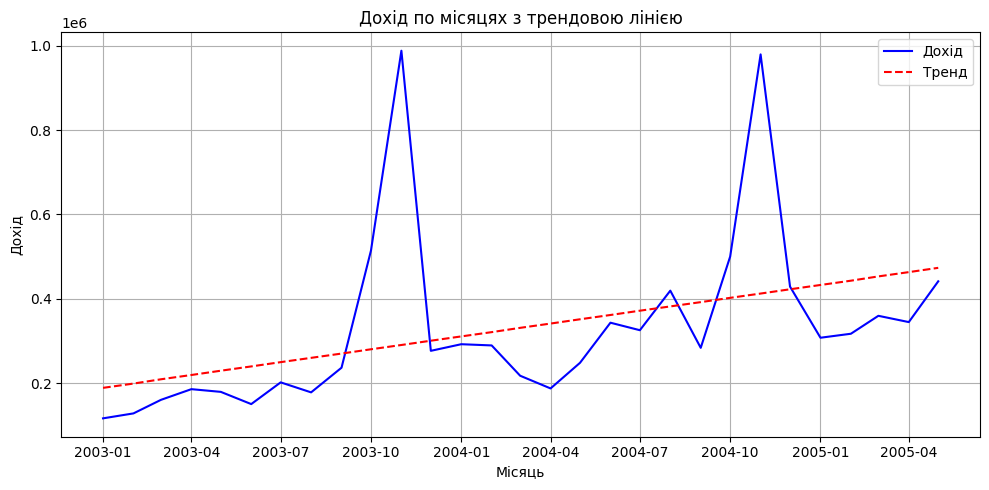

In [50]:
# 1. Лінійний графік доходу з трендом (аби показати, що тренд є)

import matplotlib.pyplot as plt
import numpy as np

df_4['month'] = pd.to_datetime(df_4['month'])

df_4 = df_4.sort_values('month')

x = np.arange(len(df_4))
y = df_4['revenue']
z = np.polyfit(x, y, 1)  # Лінійна регресія
trend = np.poly1d(z)

plt.figure(figsize=(10, 5))
plt.plot(df_4['month'], df_4['revenue'], label='Дохід', color='blue')
plt.plot(df_4['month'], trend(x), label='Тренд', color='red', linestyle='dashed')
plt.title('Дохід по місяцях з трендовою лінією')
plt.xlabel('Місяць')
plt.ylabel('Дохід')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


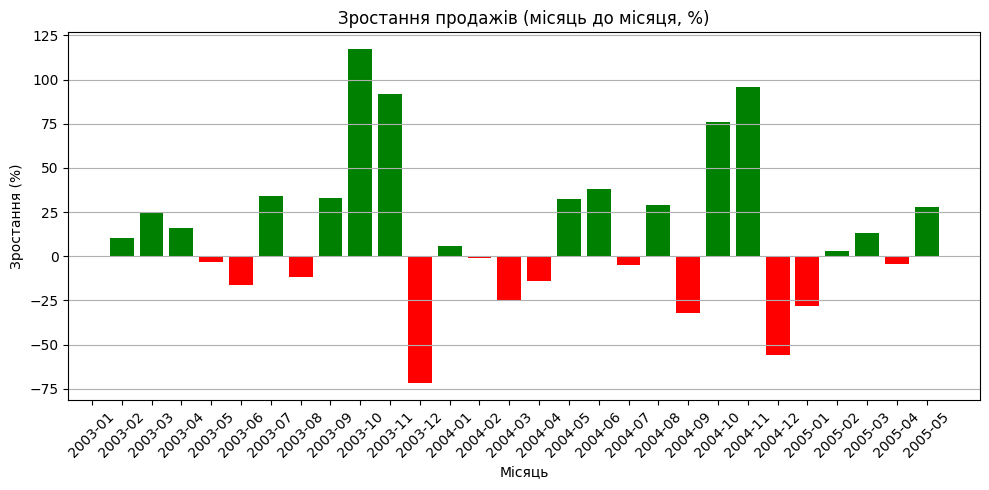

In [51]:
# 2. Місяць-до-місяця зростання

df_4['month_str'] = df_4['month'].dt.strftime('%Y-%m')

colors = ['green' if val >= 0 else 'red' for val in df_4['growth_pct'].fillna(0)]

plt.figure(figsize=(10, 5))
plt.bar(df_4['month_str'], df_4['growth_pct'], color=colors)
plt.xticks(rotation=45)
plt.title('Зростання продажів (місяць до місяця, %)')
plt.xlabel('Місяць')
plt.ylabel('Зростання (%)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [52]:
df_4['month'] = pd.to_datetime(df_4['month'])
df_4['sales_year'] = df_4['month'].dt.year
df_4['sales_month'] = df_4['month'].dt.month

df_4[['month', 'sales_year', 'sales_month']].head()


,month,sales_year,sales_month
28,2003-01-01,2003,1
27,2003-02-01,2003,2
25,2003-03-01,2003,3
22,2003-04-01,2003,4
23,2003-05-01,2003,5


In [53]:
heatmap_data = df_4.pivot_table(
    values='revenue',
    index='sales_month',
    columns='sales_year',
    aggfunc='sum'
)

heatmap_data


sales_year,2003,2004,2005
sales_month,,,
1,116692.77,292385.21,307737.02
2,128403.64,289502.84,317192.17
3,160517.14,217691.26,359711.96
4,185848.59,187575.77,344820.62
5,179435.55,248325.30,441474.94
6,150470.77,343370.74,NaN
7,201940.36,325563.49,NaN
8,178257.11,419327.09,NaN
9,236697.85,283799.80,NaN


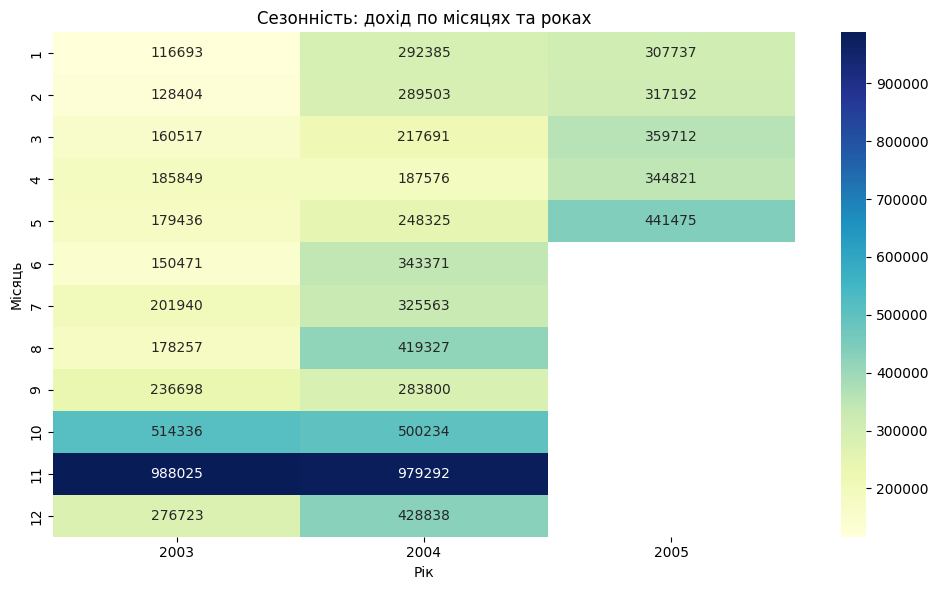

In [55]:
# 3. Heatmap сезонності
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.heatmap(
    heatmap_data,      
    annot=True,          
    fmt=".0f", 
    cmap="YlGnBu"         
)

plt.title("Сезонність: дохід по місяцях та роках")
plt.xlabel("Рік")
plt.ylabel("Місяць")

# Щоб не було злипання
plt.tight_layout()
plt.show()


In [56]:
df_4 = df_4.sort_values('month')  # переконаймось, що дані по порядку
df_4['moving_avg'] = df_4['revenue'].rolling(window=3).mean()

df_4[['month', 'revenue', 'moving_avg']].head(6)


,month,revenue,moving_avg
28,2003-01-01,116692.77,NaN
27,2003-02-01,128403.64,NaN
25,2003-03-01,160517.14,135204.516667
22,2003-04-01,185848.59,158256.456667
23,2003-05-01,179435.55,175267.093333
26,2003-06-01,150470.77,171918.303333


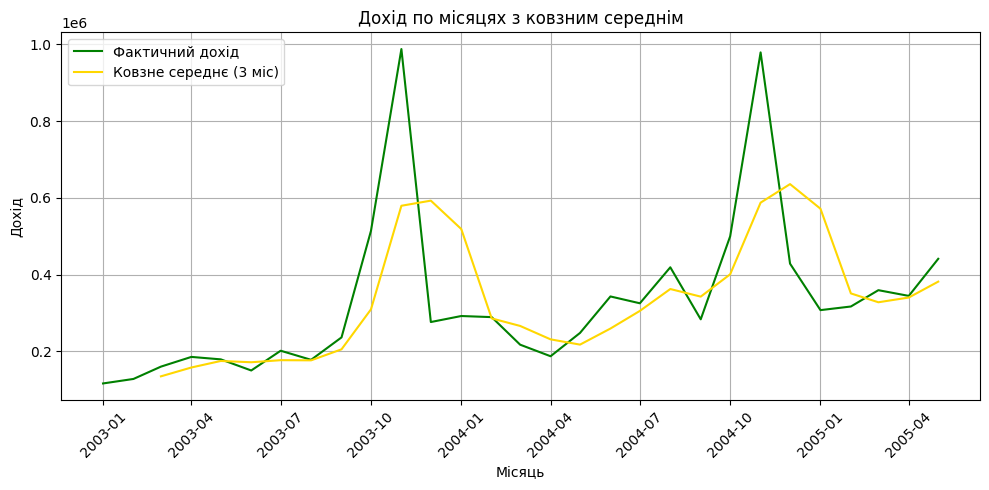

In [57]:
# 4. Ковзне середнє з динімікою доходу
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.plot(df_4['month'], df_4['revenue'], label='Фактичний дохід', color='green')

plt.plot(df_4['month'], df_4['moving_avg'], label='Ковзне середнє (3 міс)', color='gold')

plt.title("Дохід по місяцях з ковзним середнім")
plt.xlabel("Місяць")
plt.ylabel("Дохід")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [58]:
df_4['avg_check'] = df_4['revenue'] / df_4['orders_count']

df_4[['revenue', 'orders_count', 'avg_check']].head()


,revenue,orders_count,avg_check
28,116692.77,5,23338.554000
27,128403.64,3,42801.213333
25,160517.14,6,26752.856667
22,185848.59,7,26549.798571
23,179435.55,6,29905.925000


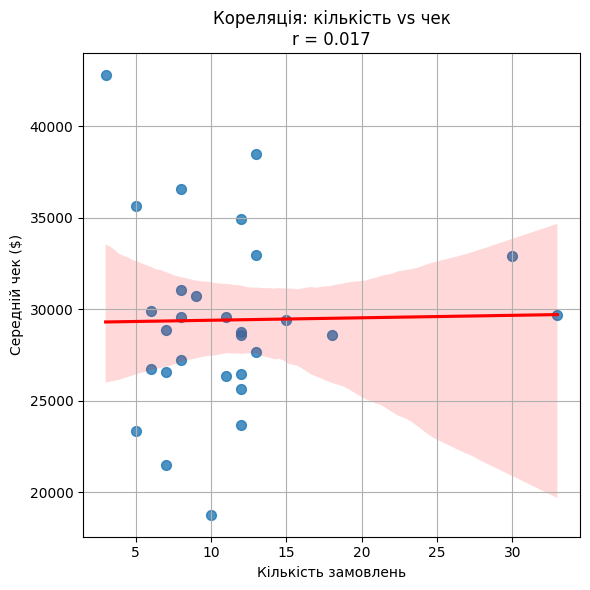

In [61]:
# 5. Кореляція замовлень та середнього чеку
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_4['orders_count'].corr(df_4['avg_check'])

plt.figure(figsize=(6, 6))
sns.regplot(
    x='orders_count',
    y='avg_check',
    data=df_4,
    scatter_kws={'s': 50},   
    line_kws={'color': 'red'})

plt.title(f'Кореляція: кількість vs чек\nr = {round(correlation, 3)}')
plt.xlabel('Кількість замовлень')
plt.ylabel('Середній чек ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

